<a href="https://colab.research.google.com/github/anand1994sp/MACHINE-LEARNING-PROJECTS/blob/main/ANAND_LR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [336]:
df = pd.read_csv('Fish_dataset.csv')
df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


# 1. Plot a bar chart showing count of individual species?

In [337]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

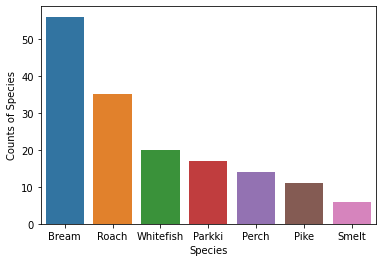

In [338]:
sns.barplot(x=df["Species"].unique(), y=df['Species'].value_counts());
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

# 2. Identify outliers and remove if any?

In [339]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [340]:
df1=df.copy()

In [341]:
col=df1.columns
col=col.drop("Species")
col

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

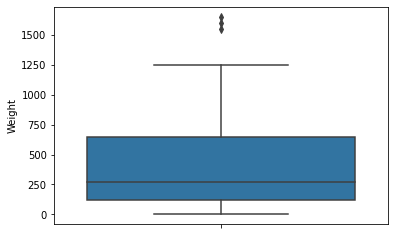

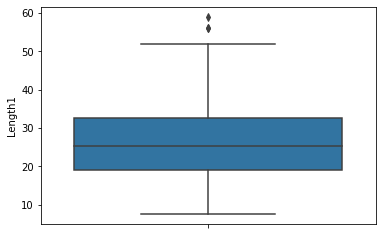

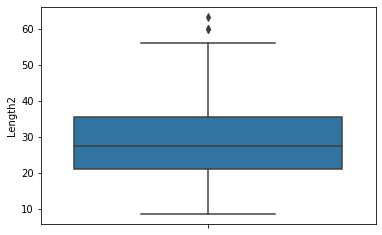

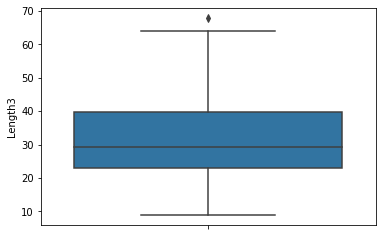

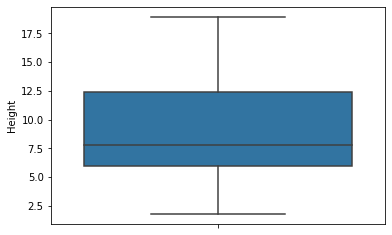

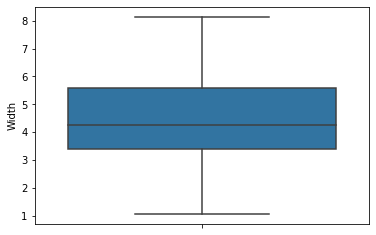

In [342]:
for i in col:
  sns.boxplot(y=df[i])
  plt.show()
  print("\n")

### Width,Length1,Length2 and Length2 has Outliers


In [343]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
P=Q3+IQR*1.5
N=Q1-IQR*1.5

In [344]:
df1.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [345]:
dfo=df1[~((df1>P) | (df1<N)).any(axis=1)]
print(df1.shape)
print(dfo.shape)

(159, 7)
(156, 7)


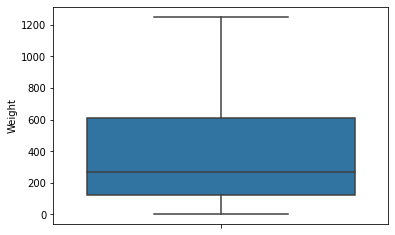

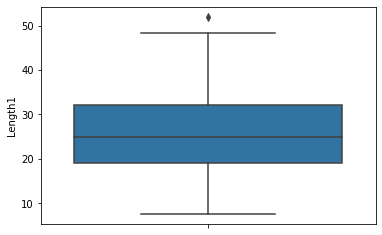

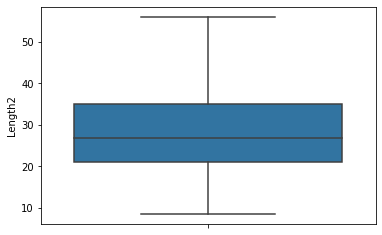

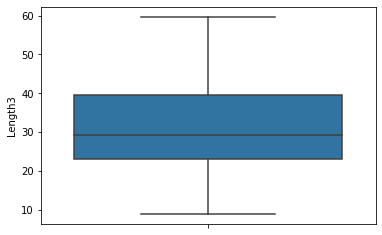

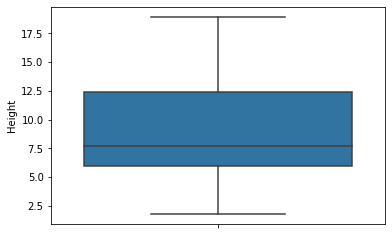

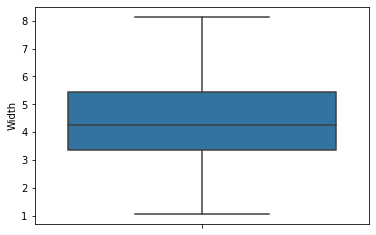

In [346]:
for i in col:
  sns.boxplot(y=dfo[i])
  plt.show()
  print("\n")

###Still Length1 has outlier

In [347]:
q1=dfo["Length1"].quantile(0.25)
q3=dfo["Length1"].quantile(0.75)
iqr=q3-q1
p=q3+iqr*1.5
n=q1-iqr*1.5
dfo=dfo[~((dfo["Length1"]>p)|dfo["Length1"]<n)]

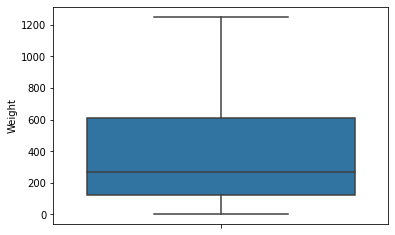

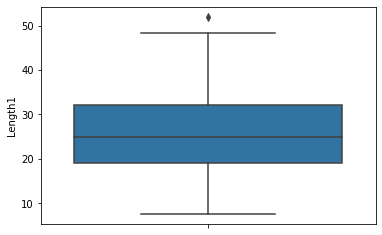

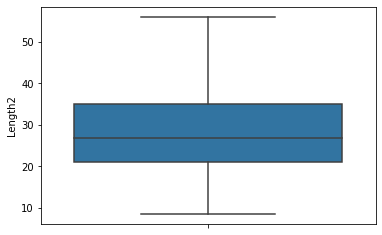

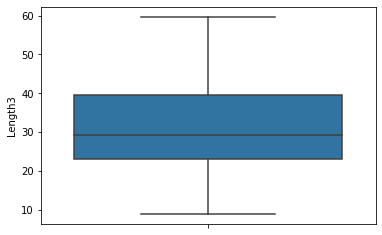

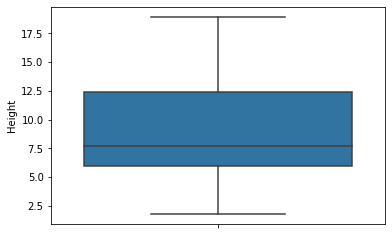

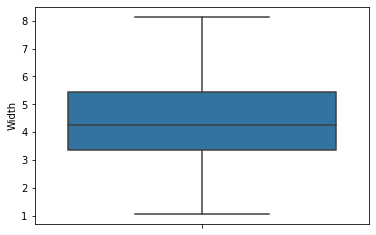

In [348]:
for i in col:
  sns.boxplot(y=dfo[i])
  plt.show()
  print("\n")

##All outliers are removed

# 3. Build a regression model and print regression equation?

In [349]:
dfo.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [350]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
dfo["Species"]=label.fit_transform(dfo["Species"])

In [351]:
dfo.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.52,4.0200
1,0,290.0,24.0,26.3,31.2,12.48,4.3056


In [352]:
dfo=pd.get_dummies(dfo,columns=["Species"],prefix="Species")
dfo.head(2)


,Weight,Length1,Length2,Length3,Height,Width,Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6
0,242.0,23.2,25.4,30.0,11.52,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.48,4.3056,1,0,0,0,0,0,0


In [353]:
dfo.drop("Species_6",axis=1,inplace=True)

In [354]:
dfo.head(2)

,Weight,Length1,Length2,Length3,Height,Width,Species_0,Species_1,Species_2,Species_3,Species_4,Species_5
0,242.0,23.2,25.4,30.0,11.52,4.0200,1,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.48,4.3056,1,0,0,0,0,0


In [355]:
# Dependant (Target) Variable:
y = dfo['Weight']
# Independant Variables:
X = dfo.iloc[:,1:]

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [357]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (109, 11)
y_train:  (109,)
X_test:  (47, 11)
y_test:  (47,)


In [358]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [359]:
# My model's parameters:
print('Model intercept: ', lr.intercept_)
print('Model slope: ', lr.coef_)
c=lr.intercept_
m=lr.coef_

Model intercept:  -561.6492839161904
Model slope:  [  19.81538153    6.465475    -13.30911355   59.82177037   34.33561288
 -225.21764264 -125.54401749   19.95105471   15.67549571  -32.71375066
  263.6551145 ]


In [360]:
#y=mx+c
print(f"y={m[0]}*X1+{m[1]}*X2+{m[2]}*X3+{m[3]}*X4+{m[4]}*X5+{m[5]}*X6+{m[6]}*X7+{m[7]}*X8+{m[8]}*X9+{m[9]}*X10+{m[10]}*X11+{c}")


y=19.815381530191484*X1+6.465475003165077*X2+-13.309113551095265*X3+59.82177037017119*X4+34.33561287927939*X5+-225.217642635901*X6+-125.54401749478968*X7+19.95105470766865*X8+15.675495713643956*X9+-32.7137506592365*X10+263.6551144996159*X11+-561.6492839161904


# 4. What is the mean score of the model at  95% confidence interval?

In [361]:
y_pred = lr.predict(X_test)

In [362]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print(cross)

[0.92084233 0.95661337 0.94655449 0.877812   0.91044338]


In [363]:
cross.mean()

0.9224531148427362

# 5. Compare real and predicted weights and give a conclusion statement based on it?

In [364]:
y_pred = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred.head(2)

,Estimated Weight
0,72.520027
1,373.449471


In [365]:
y_test = pd.DataFrame(y_test)
y_test.head()

,Weight
80,85.0
106,250.0
116,900.0
129,300.0
32,925.0


In [367]:
y_test=y_test.reset_index(drop=True)

In [368]:
y_test.head()

,Weight
0,85.0
1,250.0
2,900.0
3,300.0
4,925.0


In [369]:
compare = pd.concat([y_test, y_pred], axis=1)
compare

,Weight,Estimated Weight
0,85.0,72.520027
1,250.0,373.449471
2,900.0,806.221030
3,300.0,283.133643
4,925.0,936.597836
5,100.0,66.616907
6,120.0,102.624713
7,130.0,165.320103
8,770.0,614.690942
9,456.0,499.777669


In [371]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9389633118836163

In [372]:
ypre=lr.predict(X_train)

In [373]:
r2_score(y_train,ypre)

0.9443312874394953

**Conclusion Statement : From the results above, one can see that there is only 1% difference between Train dataset and Test dataset.So Low Variance and Low Bias and Model is perfect**